## ネットワーク構造の様々な指標

### 密度
- ネットワークの全体的な構造的特徴を示す値の1つに*密度*がある．
- 密度とはグラフについて貼ることのできる全ての編の数に対する実際の辺の数の比率である．
- 単純グラフの場合(ループや多重辺を含まないグラフ)の場合，頂点数$n$の無向グラフにおいて可能な辺の数は$\frac{n(n-1)}{2}$であるので実際の考えているグラフに含まれている辺の数を$m$とすると密度は以下のようになる

$$
\begin{equation*}
    density = \frac{m}{\frac{n(n-1)}{2}} = \frac{2m}{n(n-1)}
\end{equation*}
$$


- 行列の演算から有効グラフの隣接行列を求めてみる

In [11]:
F_3.1 <- matrix(c(
    0, 1, 1, 1, 1, 
    1, 0, 0, 1, 1, 
    1, 0, 0, 0, 0, 
    1, 1, 0, 0, 0, 
    1, 1, 0, 0, 0), 
    nrow = 5)

F_3.2 <- matrix(c(
    0, 1, 1, 1, 1, 
    0, 0, 0, 1, 1, 
    0, 0, 0 , 0, 0, 
    0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0), nrow = 5, byrow = TRUE)

In [4]:
n_1 = nrow(F_3.1)

sum(F_3.1)/(n_1 * (n_1 - 1))  # sum(F_3.1) = 2mになっていることに注意.

[1] 0.6

In [5]:
n_2 = nrow(F_3.2)

sum(F_3.2)/(n_2 * (n_2 - 1))

[1] 0.3

- 密度はネットワークにおいて、完全グラフにどのぐらい近いかを表す指標になっている．
- 社会ネットワークを考えると，密度は集団における人間関係の密接さや個人に対する集団からの制御しやすさの指標となりうる
- 頂点の異なるグラフでも密度は比較することはできるが，注意が必要であることは明らかである．
    - ネットワークを構成する頂点が10倍になっただけで同等の密度を保つためにはコストは100倍近く必要になるからである．

 ## 推移性
 - ネットワークにおいて，頂点$i$と頂点$j$の間，頂点$j$と頂点$k$の間に関係があり、頂点$i$と頂点$k$の間にも関係がある場合を関係が**推移的**(transitive)であるという. 
 - 無向グラフにおいて関係が*推移的である* $\underset{\text{def}}{\Longleftrightarrow}$ 頂点$i$と頂点$j$に辺があり，かつ頂点$j$, $k$にも辺があり、かつ頂点$i$, $k$にも辺がある状態のことを言う
 - 推移的な関係が成り立っている程度を比率で表したものを**推移性**という.

In [15]:
A <- matrix(c(
0,1,1,1,1,1,0,0,
1,0,1,0,0,0,1,0,
1,1,0,0,0,0,0,0,
1,0,0,0,1,0,0,1,
1,0,0,1,0,1,0,0,
1,0,0,0,1,0,0,0,
0,1,0,0,0,0,0,0,
0,0,0,1,0,0,0,0),
nrow = 8)

# 長さ2の経路が各頂点間に幾つ存在するかを調べる.
# 自分自身への閉路は考えないのでたいかくせいぶんを0 にする

A2 <- A %*% A
diag(A2) <- 0   # A2の対角成分に0を代入
print(A2) # ながさ2の経路の情報を持つ行列
print(A)
print(A2*A)    # 元々つながっていなかった頂点同士をこの操作で消せる

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    0    1    1    1    2    1    1    1
[2,]    1    0    1    1    1    1    0    0
[3,]    1    1    0    1    1    1    1    0
[4,]    1    1    1    0    1    2    0    0
[5,]    2    1    1    1    0    1    0    1
[6,]    1    1    1    2    1    0    0    0
[7,]    1    0    1    0    0    0    0    0
[8,]    1    0    0    0    1    0    0    0
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    0    1    1    1    1    1    0    0
[2,]    1    0    1    0    0    0    1    0
[3,]    1    1    0    0    0    0    0    0
[4,]    1    0    0    0    1    0    0    1
[5,]    1    0    0    1    0    1    0    0
[6,]    1    0    0    0    1    0    0    0
[7,]    0    1    0    0    0    0    0    0
[8,]    0    0    0    1    0    0    0    0
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    0    1    1    1    2    1    0    0
[2,]    1    0    1    0    0    0    0    0
[3,]    1    1    0    0    0    0    0    0
[4,]    1 

In [8]:
# 両端の頂点の推移性を計算する
# sum(A2)はグラフ内の辺の数
sum(A2 * A)/sum(A2)       # A2*Aは成分同士の積であることに注意. 

[1] 0.4285714

## 相互性
- 有向グラフにおける有向辺の張り方は，3つのパターンがある．
- a. 2つの頂点から互いに有向辺が伸びている
- b. 2つの頂点間に有向辺が存在しない
- c どちらか片方からだけ相手側に伸びている
- 恋愛に例えるなら
    - a $\to$ 両思い
    - b $\to$ 互いを恋愛対象としてみていない
    - c $\to$ 一方の片思い
- 有向グラフにおいて全体において，両思いの割合がどのぐらい占めているかという指標を**相互性**(reciprocity, mutuality)という．

In [20]:
#F_3は有向グラフを表す
F_3 <- matrix(c(
0,1,0,0,1,
1,0,1,0,0,
0,1,0,1,0,
1,0,1,0,0,
0,0,0,1,0),
nrow = 5,
byrow = TRUE)


# F_3の転置行列と元のF_3との要素間の積を取ることにより，両思いなら1, それ以外なら0になる
# F_3 + t(F_3) で考えられうる両思いの辺の数を計算
a <- F_3 * t(F_3)
acd <- F_3 + t(F_3)
acd[which(acd >= 1)] <- 1
sum(a)/sum(acd)

[1] 0.5

## 階層的構造
- 多くの企業などは職階性や指揮系統に見られるようにピラミッド型の階層的な組織構造を持っている．
- 企業内の組織図にかかわらず，仲間集団におけるリーダーとその配下のような人間関係においても階層的構造が形成されている場合もある．
- グラフ構造でいうと，最も上位にある1つの頂点から他の下位の頂点へと有向辺の連なるout-tree構造を最も典型的な階層構造を持つネットワークとした．
- out-tree構造なグラフ $\underset{\text{def}}{\Longleftrightarrow}$ n個の頂点と(n-1)本の有向辺からなり，ある単一の頂点から他の全ての頂点へと到達可能な有向グラフ
- その中で、Krackhardtはこのようなout-tree構造の必要十分条件として4つの性質を考え，この性質に違反している程度から、ある有向グラフが階層的構造を持っているかどうかを評価している．その4つの指標は以下の通りである．
- **連結性**とは$V$を辺の向きを無視しても相互に到達不可能な頂点の数, その有向グラフに含まれる頂点数を$n$とすると
$$
\begin{equation*}
    connectedness = 1 - \frac{V}{\frac{n(n-1)}{2}} = 1 - \frac{2V}{n(n-1)}
\end{equation*}
$$
で算出される．

- out-tree構造において，到達可能な2つの頂点間の関係は上位のポジションから下位のポジションへと常に一方的である．
- そこで，もし2つの頂点間にお互いに到達可能な関係があるならその頂点間では上下関係はなく，階層性に違反していることになる．
- よって，少なくとも一方から他方へ到達可能な頂点の組みのうち，互いに行き来できない頂点の組みの比率によって階層性を定義することができる．
- $V$は互いに到達可能な頂点数，$MaxV$は少なくとも一方から他方へ到達可能な頂点の数とする．すると，階層性を以下で定義する．
$$
\begin{equation*}
    \text{hierarchy} = 1 - \frac{V}{Max V}
\end{equation*}
$$

- out-tree構造は上位の頂点から下位の頂点へと必ず1つの経路を通って到達できるという意味で**効率的**であると言える．
- そこで，もし，上位の頂点$i$から下位の頂点$j$への経路が2つ以上ある場合は冗長であるので，そのネットワークは**効率的であるとは言えない**．
- この**効率性**を定量化したのが次の**効率性**といった概念である．
- $n$個の頂点と$m$個の有効辺からなる弱連結(互いに行き来できることを認めると任意の頂点間を行き来できるグラフ構造のこと)の有向グラフを考える．
- もし，このグラフがout-tree構造なら，そこに含まれる有向辺の数$m$は$n$より1少なく$m = n-1$になる．
- よって，必ずしもout-tree構造でない実際の有向グラフに含まれる冗長な有向辺の数は$m - (n-1)$と表すことができる．
- $m$の理論的な最大値は$n(n-1)$であるので，冗長な有向辺の数の理論的最大値は$n(n-1) - (n-1)$である．
- これらを用いて，効率性は以下のように定義できる．
- ここで，$V$は$n-1$を超える冗長な有向辺の数，Max$V$は冗長な有向辺の理論的最大値である．

$$
\begin{align*}
    efficiency &= 1 - \frac{V}{Max V}  \\
                   &= 1 - \frac{m - (n-1)}{n(n-1) - (n-1)}   \\
                   &= 1 - \frac{m - (n-1)}{(n-1)^2}
\end{align*}
$$


## snaを用いてネットワーク構造の指標を計算

In [1]:
 library(sna)
# ネットワークの密度を求める
# gdenはgraph densityの略?
gden(F_3.1)   

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following object is masked from ‘package:base’:

    order


Loading required package: network

network: Classes for Relational Data
Version 1.15 created on 2019-04-01.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




ERROR: Error in as.edgelist.sna(dat):  オブジェクト 'F_3.1' がありません 


In [12]:
gden(F_3.2)

[1] 0.3

In [13]:
# 推移性を求める
gtrans(A)

[1] 0.4285714

In [16]:
# 相互性を求める
# 有向グラフにおいて全体において，両思いの割合がどのぐらい占めているかという指標を相互性(reciprocity, mutuality)という．
grecip(F_3, measure = "dyadic.nonnull")

Mut 
0.5

In [17]:
# 双方向の数そのものを求める
mutuality(F_3)

Mut 
  3

In [18]:
# 対等な関係として扱うべきかどうか的なやつ
grecip(F_3, measure = "dyadic")

Mut 
0.7

- Krackhardtの階層的構造の指標を算出する関数で計算．
- 連結性, 階層性, 効率性, 最小上界性を求める.

In [3]:
Fig3.8 <- matrix(c(
0,0,1,1,0,
0,0,0,1,1,
0,0,0,1,0,
0,0,0,0,0,
0,1,0,0,0),
nrow = 5, ncol = 5,
byrow = TRUE)

In [5]:
connectedness(Fig3.8)

[1] 1

- 連結性は1なので、方向を無視すれば、任意の頂点間同士の行き来ができる．

In [18]:
hierarchy(Fig3.8, measure = "krackhardt")

ERROR: Error in hierarchy(Fig3.8, measure = "krackhardt"):  使われていない引数 (measure = "krackhardt") 


In [8]:
efficiency(Fig3.8)

[1] 0.875

In [9]:
lubness(Fig3.8)

Node 1, Reach 3, Total 3
Node 2, Reach 3, Total 6
Node 3, Reach 2, Total 8
Node 4, Reach 1, Total 9
Node 5, Reach 3, Total 12


[1] 0.3333333

## igraphの場合

In [2]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [12]:
g3.1 <- graph_from_adjacency_matrix(F_3.1, mode = "undirected")
g3.2 <- graph_from_adjacency_matrix(F_3.2)

In [13]:
edge_density(g3.1)

[1] 0.6

In [14]:
edge_density(g3.2)

[1] 0.3

In [16]:
# 推移性の計算
g3.3 <- graph_from_adjacency_matrix(A, mode = "undirected")
transitivity(g3.3, type = "global")     # type = localとすると、グラフ中の各頂点のクラスター係数を返す

[1] 0.4285714

- 上のtransitivity()関数は、向こうグラフとして計算されるので、注意が必要である。

- igraphで、相互性を求めるときは、reciprocity()関数を使えば良い．
- 相互性とは、グラフの中で、両思いの比率のことであったよね．

In [21]:
g3.5 <- graph_from_adjacency_matrix(F_3)
reciprocity(g3.5, mode = "ratio")

[1] 0.5

## 分析例
- 実際のネットワークデータを用いて、ネットワーク構造の指標を出して、考察してみる。

In [19]:
detach(package:igraph)

In [3]:
# ライブラリーとデータの読み込み
library(statnet)
data(package = "sna")
data(package = "ergm")

Loading required package: tergm

Loading required package: ergm


ergm: version 3.10.4, created on 2019-06-10
Copyright (c) 2019, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, University of Wollongong
                    Martina Morris, University of Washington
                    with contributions from
                    Li Wang
                    Kirk Li, University of Washington
                    Skye Bender-deMoll, University of Washington
                    Chad Klumb
Based on "statnet" project software (statnet.org).
For license and citation information see statnet.org/attribution
or type citation("ergm").


NOTE: Versions before 3.6.1 had a bug in the implementation of the bd()
constriant which distorted the sampled distribution 

- snaパッケージのcolemanというデータがどのようなデータなのかは以下のhelpで詳細を見ることができる。

In [25]:
?coleman

## colemanデータの簡単な説明
- 73人の男子高校生の友人関係を示したネットワークである．
- 1957年秋、1958年春の2回, よく付き合いのある相手を教えてもらい、その方向を記録したデータ(つまり、有向グラフ)

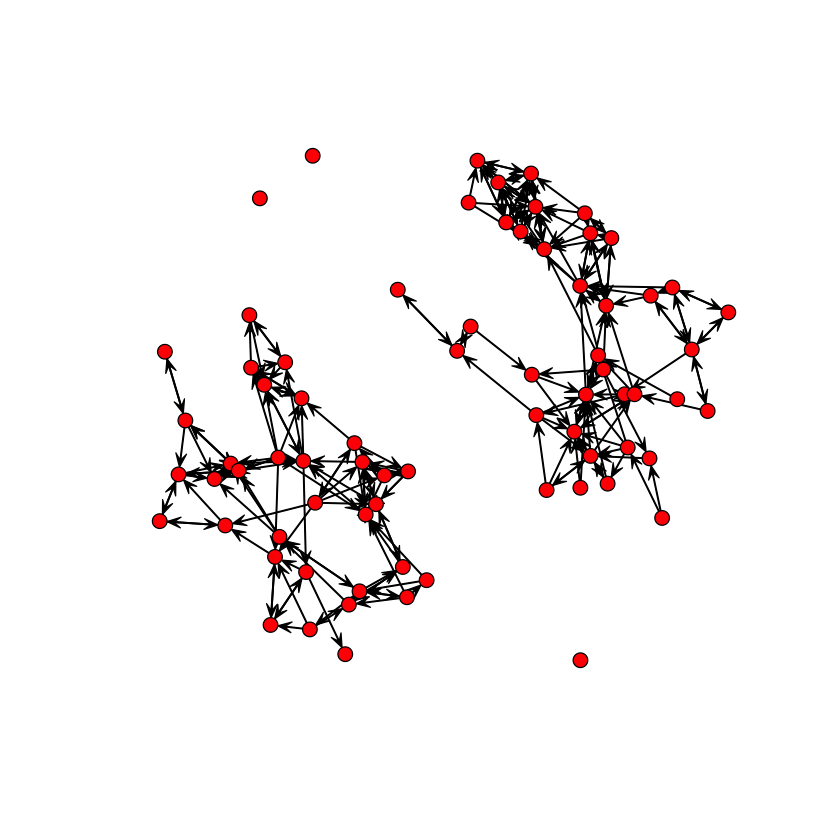

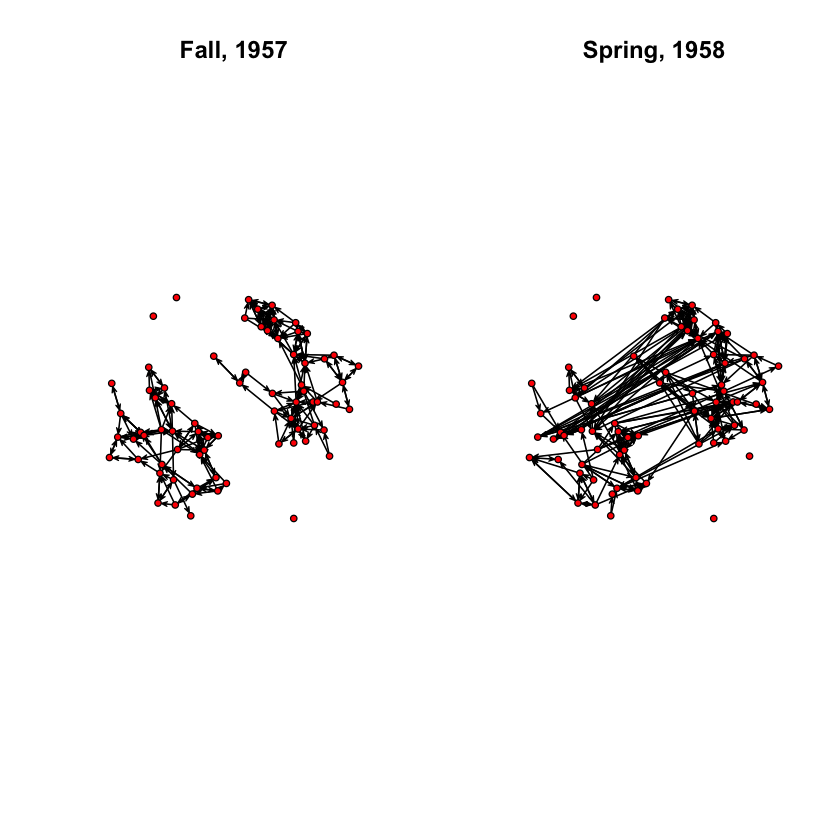

In [6]:
data(coleman)
# 以下、ネットワーク構造をプロットする．
# RStudioでやったほうが、見やすい図が得られる．
coord1 <- gplot(coleman, g  = 1)
quartz(width = 30, height = 18)
par(mfrow = c(1, 2))
gplot(coleman, g = 1, coord = coord1, main = "Fall, 1957")
gplot(coleman, g = 2, coord = coord1, main = "Spring, 1958")

### snaパッケージを用いて,友人間のネットワークを分析するよ
- 密度

In [17]:
# 密度を求める
gden(coleman)

Fall     Spring 
0.04623288 0.05003805

- 推移性
    - 高いほど、みんなが繋がりを持っている？と思って良い

In [11]:
gtrans(coleman)

[1] 0.4626866 0.3802817

- 相互性を求める
    - 有向グラフにおいて全体において，両思いの割合がどのぐらい占めているかという指標を相互性(reciprocity, mutuality)という．
    - 高いほど、グラフ間で両思いの割合が高い

In [12]:
grecip(coleman, measure = "dyadic.nonnull")

Fall    Spring 
0.3425414 0.3019802

- 双方向の関係数(*相互性*の数)
    - グラフ間で両思いの数を表す

In [13]:
mutuality(coleman)

Fall Spring 
    62     61

- 連結性を計算する
    - 辺の向きを無視して、互いに行き来可能な頂点の数の比率
    - どのぐらい、完全グラフに近いかを表す

In [14]:
connectedness(coleman)

Fall    Spring 
0.4543379 0.8926941

- 連結性の値が大きくなっているのは大変面白い
- これは、1957年の秋から1958年の春になる期間で、男子高校生の友人ネットワークが成長していることを表している．
- まあ確かに、時が経つと、友人関係が広がるので、妥当ではあるな〜って感じ
- こうゆうのがしっかりと定量化できているのが面白い．

## 階層性
- 階層性の計算
- 既に、graphパッケージを読み込んでいると、エラーが出るので*detach(package:igraph)*が必要であることに注意せよ

In [20]:
hierarchy(coleman, measure = "krackhardt")  

Node 1, Reach 26, Total 26
Node 2, Reach 25, Total 51
Node 3, Reach 27, Total 78
Node 4, Reach 32, Total 110
Node 5, Reach 32, Total 142
Node 6, Reach 24, Total 166
Node 7, Reach 24, Total 190
Node 8, Reach 24, Total 214
Node 9, Reach 25, Total 239
Node 10, Reach 1, Total 240
Node 11, Reach 32, Total 272
Node 12, Reach 24, Total 296
Node 13, Reach 24, Total 320
Node 14, Reach 24, Total 344
Node 15, Reach 25, Total 369
Node 16, Reach 32, Total 401
Node 17, Reach 24, Total 425
Node 18, Reach 32, Total 457
Node 19, Reach 32, Total 489
Node 20, Reach 24, Total 513
Node 21, Reach 24, Total 537
Node 22, Reach 24, Total 561
Node 23, Reach 33, Total 594
Node 24, Reach 25, Total 619
Node 25, Reach 1, Total 620
Node 26, Reach 32, Total 652
Node 27, Reach 32, Total 684
Node 28, Reach 30, Total 714
Node 29, Reach 25, Total 739
Node 30, Reach 18, Total 757
Node 31, Reach 18, Total 775
Node 32, Reach 32, Total 807
Node 33, Reach 32, Total 839
Node 34, Reach 30, Total 869
Node 35, Reach 18, Total 887

Fall    Spring 
0.7009848 0.8029793

- 友人関係が発展していく中で、力関係が生じて、階層性の値が上昇しているのも面白い

In [21]:
efficiency(coleman)

Fall    Spring 
0.9245690 0.9578287

In [22]:
lubness(coleman)

Node 1, Reach 26, Total 26
Node 2, Reach 25, Total 51
Node 3, Reach 27, Total 78
Node 4, Reach 32, Total 110
Node 5, Reach 32, Total 142
Node 6, Reach 24, Total 166
Node 7, Reach 24, Total 190
Node 8, Reach 24, Total 214
Node 9, Reach 25, Total 239
Node 10, Reach 1, Total 240
Node 11, Reach 32, Total 272
Node 12, Reach 24, Total 296
Node 13, Reach 24, Total 320
Node 14, Reach 24, Total 344
Node 15, Reach 25, Total 369
Node 16, Reach 32, Total 401
Node 17, Reach 24, Total 425
Node 18, Reach 32, Total 457
Node 19, Reach 32, Total 489
Node 20, Reach 24, Total 513
Node 21, Reach 24, Total 537
Node 22, Reach 24, Total 561
Node 23, Reach 33, Total 594
Node 24, Reach 25, Total 619
Node 25, Reach 1, Total 620
Node 26, Reach 32, Total 652
Node 27, Reach 32, Total 684
Node 28, Reach 30, Total 714
Node 29, Reach 25, Total 739
Node 30, Reach 18, Total 757
Node 31, Reach 18, Total 775
Node 32, Reach 32, Total 807
Node 33, Reach 32, Total 839
Node 34, Reach 30, Total 869
Node 35, Reach 18, Total 887

Fall    Spring 
0.6660746 0.3349429

In [23]:
# 関係の増分を計算する
sum(coleman[2, , ] ) - sum(coleman[1, , ])

[1] 20

## Zacharyの空手クラブのネットワークを使う

In [27]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [28]:
(karate <- make_graph("Zachary"))

IGRAPH f9e24de U--- 34 78 -- Zachary
+ attr: name (g/c)
+ edges from f9e24de:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3--28  3--29  3--33  3--10
[31]  3-- 9  3--14  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--33
[61] 24--34 24--30 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

- このネットワークは、ある空手クラブの分裂に関する社会人類学的研究において観察されたもの
- クラブ以外での友人関係を表している
- 出力の見方
    - 無向グラフ(U), 34の頂点と78の辺を持つ

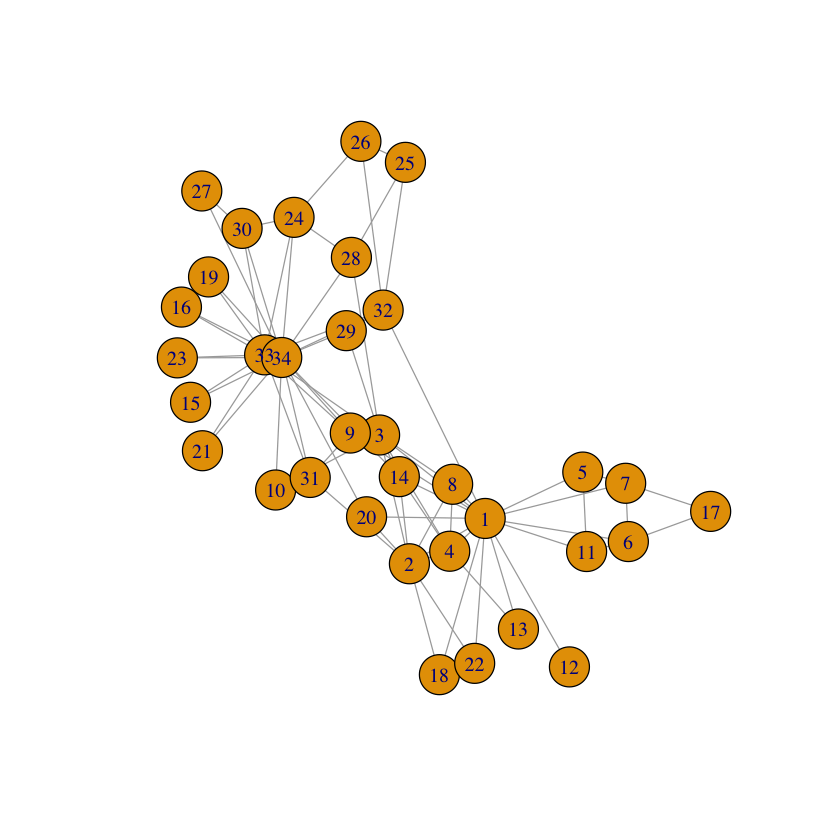

In [29]:
plot(karate)

- ネットワークの密度を求める

In [30]:
edge_density(karate)

[1] 0.1390374

In [31]:
transitivity(karate, type = "global")

[1] 0.2556818